# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [44]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [2]:
# Завантаження даних
df = pd.read_csv('../data/House_Rent_Dataset.csv')

In [3]:
# Розмір датасету
df.shape

(4746, 12)

In [4]:
# Перші 5 рядків
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
# Загальна інформація про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [6]:
# Аналіз пропущених значень
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Пропущених значень немає 

In [7]:
# Базова статистика
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


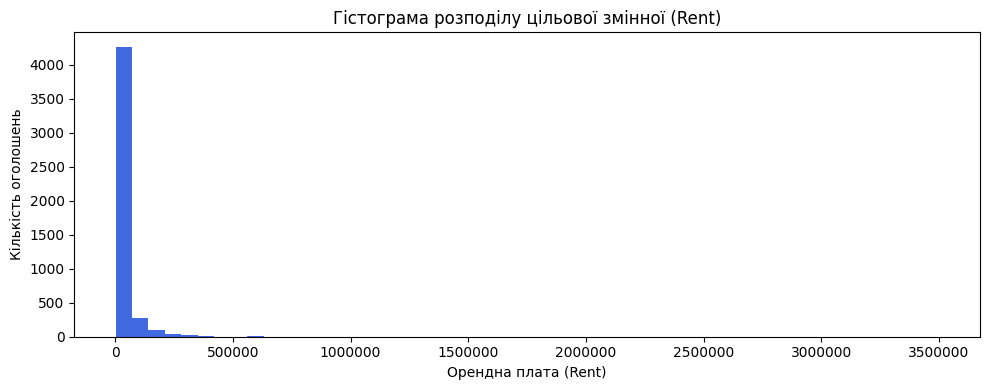

In [8]:
# Гістограма розподілу цільової змінної (Rent)
Rent_dist = df['Rent']
fig, ax = plt.subplots(figsize=(12, 6))

Rent_dist.plot.hist(
    ax = ax,
    figsize=(10, 4),
    title='Гістограма розподілу цільової змінної (Rent)',
    xlabel='Орендна плата (Rent)',
    ylabel='Кількість оголошень',
    color='royalblue',
    bins=50,
);

ax.ticklabel_format(style='plain', axis='both')
plt.tight_layout()

В більшості оголошень орендна плата до 150000

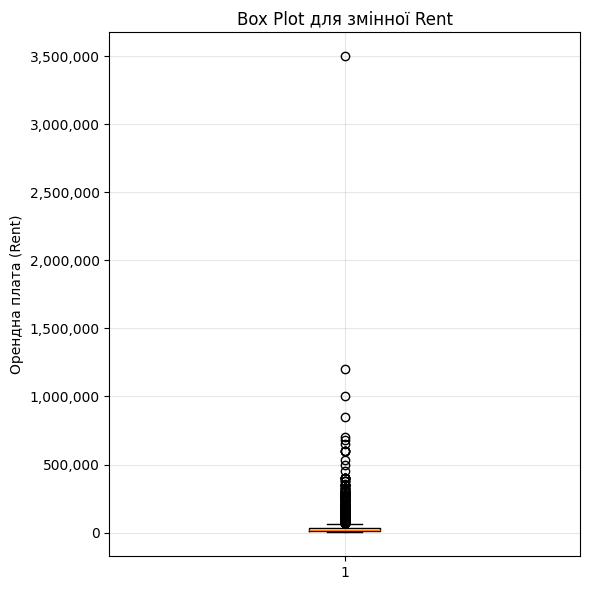

In [9]:
# Box plot
plt.figure(figsize=(6, 6))
plt.boxplot(df['Rent'])
plt.title('Box Plot для змінної Rent')
plt.ylabel('Орендна плата (Rent)')
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

Діаграма вказує на наявні викиди - є квартири з вартістю оренди 1000000 та навіть 3500000 - це ексклюзивні варіанти, які потрібно аналізувати окремо.

Використаємо метод інтерквартильного розмаху для виявлення та видалення викидів

In [10]:
# Використовуємо IQR метод
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Викиди: значення < {lower_bound:,.0f} або > {upper_bound:,.0f}")

# Видаляємо викиди
df_clean = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]
print(f'Видалено {len(df) - len(df_clean)} записів з викидами ({(len(df) - len(df_clean))/len(df)*100:.1f}%)')

Викиди: значення < -24,500 або > 67,500
Видалено 520 записів з викидами (11.0%)


In [11]:
# Кількість унікальних значень для кожної з категоріальних колонок (після видалення викідів)
categorical_columns = df_clean.select_dtypes(include=['object']).columns


for column in categorical_columns:
    unique_count = df_clean[column].nunique()
    print(f'{column}: {unique_count} унікальних значень')



Posted On: 80 унікальних значень
Floor: 340 унікальних значень
Area Type: 3 унікальних значень
Area Locality: 1997 унікальних значень
City: 6 унікальних значень
Furnishing Status: 3 унікальних значень
Tenant Preferred: 3 унікальних значень
Point of Contact: 3 унікальних значень



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [12]:
# Матриця кореляцій для числових змінних
correlation_matrix = df_clean.select_dtypes(include=['int64']).corr()

# Візуалізація матриці кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Кореляція між числовими параметрами квартири (без викидів)',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=500)
fig.show()

Маємо помірну позитивну кореляцію між розміром орендної плати і кількістю кімнат, ваних кімнат, загальною площею квартири

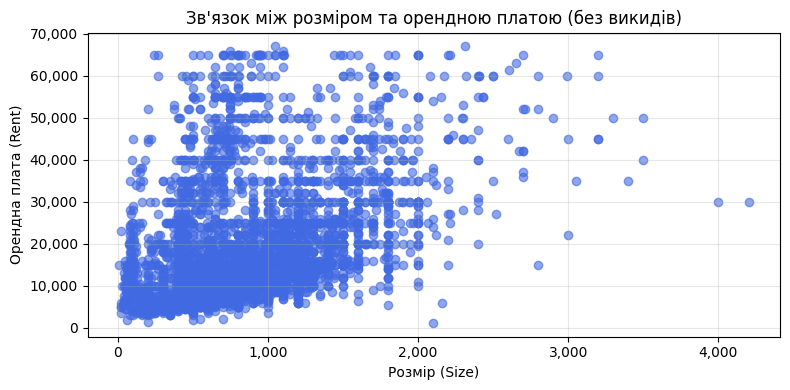

In [13]:
# scatter plot Size vs Rent
plt.figure(figsize=(8, 4))
plt.scatter(df_clean['Size'], df_clean['Rent'], alpha=0.6, color='royalblue')

plt.title('Зв\'язок між розміром та орендною платою (без викидів)')
plt.xlabel('Розмір (Size)')
plt.ylabel('Орендна плата (Rent)')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

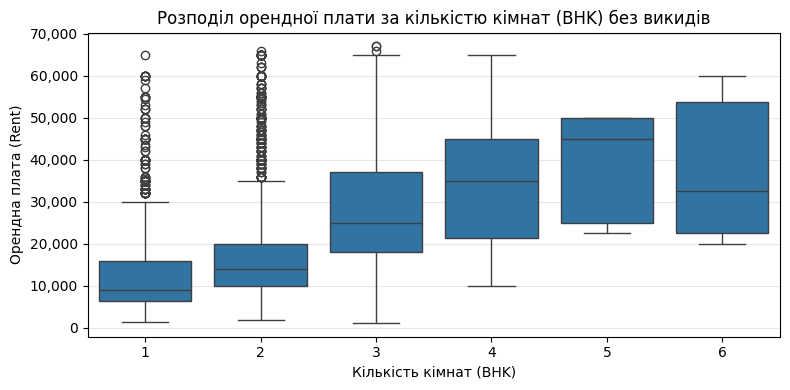

In [14]:
# BHK vs Rent boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_clean, x='BHK', y='Rent')

plt.title('Розподіл орендної плати за кількістю кімнат (BHK) без викидів')
plt.xlabel('Кількість кімнат (BHK)')
plt.ylabel('Орендна плата (Rent)')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Бачимо, що розкид значень і медіанна орендна плата росте до 5 кінмант в квартирі, але для шестикімнатних медіана знижується. Одно і двокімнатні мають найбільше викидів - довгий правий хвіст. Це може свідчити про наявність елітних квартир з невеликою кількістю кімнат, але, наприклад, гарним ремонтом.

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


1) Найбільше унікальних значень для колонок:
- Posted On: 81 унікальних значень - дату розміщення оголошення можна не враховувати. Іноді, якщо оголошення є актуальним доволі довго, в ньому можуть знижувати ціну. Проте в даній моделі не будемо брати цей фактор до уваги.
- Floor: 340 унікальних значень - колонка містить дані про поверх, а також загальну поверховість будинку. Зважаючи, що структура запису однакова, спробуємо витягнути окремо поверх і окремо поверховість будинку, можливо це допоможе знизити кількість значень.
- Area Locality: 1997 унікальних значень при загальній кількості після видалення 4226 (максимальна кількість для одного значення 28) - використовувати такі дані напряму в моделі не раціонально. Якщо мати на меті їх використовувати, то можна на їх основі  робити обчислення типу района або інших характеристик з зовнішніх джерел, наприклад Places API від Google.

Інші колонки містять 3-6 унікальних значень і можна обробити їх методом One-Hot Encoding. Проте:
Колонка `Tenant Preferred` містить значення Bachelors, Family та Bachelors/Family - тобто фактично 2, а не 3, але для простоти моделі на першому етапі можна вважати їх різними.
Колонка `Furnishing Status` містить значення Unfurnished, Semi-Furnished та Furnished. Тобто для цієї колонки можна використати метод Label Encoding.

Отже, застосуємо One-Hot Encoding для колонок `Tenant Preferred`, `Area Type`, `City` та `Point of Contact`.
Застосуємо Label Encoding до колонки `Furnishing Status`

In [15]:
df_clean = df_clean.copy()

In [16]:
# One-Hot Encoding
tenant_dummies = pd.get_dummies(df_clean['Tenant Preferred'], prefix='Tenant')
area_type_dummies = pd.get_dummies(df_clean['Area Type'], prefix='Area Type')
city_dummies = pd.get_dummies(df_clean['City'], prefix='City')
contact_dummies = pd.get_dummies(df_clean['Point of Contact'], prefix='Contact')

In [17]:
# Label Encoding
furnishing_mapping = {
    'Unfurnished': 0,
    'Semi-Furnished': 1, 
    'Furnished': 2
}

df_clean['Furnishing_Status_Encoded'] = df_clean['Furnishing Status'].map(furnishing_mapping)

In [18]:
# Розділимо колонку Floor на дві числові Current_Floor та Total_Floors
floor_split = df_clean['Floor'].str.split(' out of ', expand=True)

df_clean['Current_Floor'] = floor_split[0]
df_clean['Total_Floors'] = floor_split[1]
    
# Замінимо "Ground" на 0
df_clean['Current_Floor'] = df_clean['Current_Floor'].replace({
        'Ground': '0',
        'Upper Basement': '-1',
        'Lower Basement': '-2'
    })
    
df_clean['Current_Floor'] = pd.to_numeric(df_clean['Current_Floor'])
df_clean['Total_Floors'] = pd.to_numeric(df_clean['Total_Floors'])

2. Додатково додам колонку відношення площі до кількості кімнат і ваних. При однаковій площі збільшення кількості кімнат може зіграти в мінус, бо кімнати будуть маленькі.

In [19]:
df_clean['Size_per_Room'] = df_clean['Size'] / (df_clean['BHK'] + df_clean['Bathroom'])

Для моделі візьмемо усі числові колонки і додамо dummies. Невикористаними залишились значення колонок `Posted On` та `Area Locality`

In [20]:
df_clean_enr = pd.concat([
    df_clean.select_dtypes(include=['number']),
    tenant_dummies,
    city_dummies,
    area_type_dummies,
    contact_dummies], axis=1)

df_clean_enr.head()

,BHK,Rent,Size,Bathroom,Furnishing_Status_Encoded,Current_Floor,Total_Floors,Size_per_Room,Tenant_Bachelors,Tenant_Bachelors/Family,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,Contact_Contact Agent,Contact_Contact Builder,Contact_Contact Owner
0,2,10000,1100,2,0,0,2.0,275.000000,False,True,...,False,False,True,False,False,False,True,False,False,True
1,2,20000,800,1,1,1,3.0,266.666667,False,True,...,False,False,True,False,False,False,True,False,False,True
2,2,17000,1000,1,1,1,3.0,333.333333,False,True,...,False,False,True,False,False,False,True,False,False,True
3,2,10000,800,1,0,1,2.0,266.666667,False,True,...,False,False,True,False,False,False,True,False,False,True
4,2,7500,850,1,0,1,2.0,283.333333,True,False,...,False,False,True,False,False,True,False,False,False,True


Ще раз перевіримо на порожні значення після усіх модифікацій

In [21]:
df_clean_enr.isnull().sum()

BHK                          0
Rent                         0
Size                         0
Bathroom                     0
Furnishing_Status_Encoded    0
Current_Floor                0
Total_Floors                 4
Size_per_Room                0
Tenant_Bachelors             0
Tenant_Bachelors/Family      0
Tenant_Family                0
City_Bangalore               0
City_Chennai                 0
City_Delhi                   0
City_Hyderabad               0
City_Kolkata                 0
City_Mumbai                  0
Area Type_Built Area         0
Area Type_Carpet Area        0
Area Type_Super Area         0
Contact_Contact Agent        0
Contact_Contact Builder      0
Contact_Contact Owner        0
dtype: int64

In [ ]:
# Видалимо рядки з відсутніми значеннями
df_clean_enr = df_clean_enr[df_clean_enr['Total_Floors'].notnull()]

In [31]:
# Визначимо X та y
y = df_clean_enr['Rent']
X = df_clean_enr.drop('Rent', axis=1)

print(f"\nРозмір X (ознак): {X.shape}")
print(f"Розмір y (цілі): {y.shape}")


Розмір X (ознак): (4222, 22)
Розмір y (цілі): (4222,)


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Створюємо та застосовуємо скейлер для стандартизації X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перетворюємо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Розділяємо дані: 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,  # 20% даних йде на тест
    random_state=42  # фіксуємо випадковість для відтворюваності
)

In [ ]:
# Створюємо модель лінійної регресії і навчаємо її
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# Виводимо ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

BHK: 2533.22
Size: 3652.37
Bathroom: 1849.07
Furnishing_Status_Encoded: 1390.60
Current_Floor: -201.45
Total_Floors: 1967.31
Size_per_Room: 66.92
Tenant_Bachelors: 366.49
Tenant_Bachelors/Family: -14.35
Tenant_Family: -460.85
City_Bangalore: -776.94
City_Chennai: -1040.91
City_Delhi: 269.29
City_Hyderabad: -1671.61
City_Kolkata: -1427.91
City_Mumbai: 5071.91
Area Type_Built Area: 56.19
Area Type_Carpet Area: 31.34
Area Type_Super Area: -33.80
Contact_Contact Agent: 1709.40
Contact_Contact Builder: -4.33
Contact_Contact Owner: -1708.71

Зміщення (intercept): 19380.08


На прогноз найбільше впливають:
- Розташування в місті Mumbai - збільшує орендну плату на 5071.91
- Площа  - збільшує орендну плату на 3652.37 на одиницю площі
- Кількість кімнат - збільшує орендну плату на 2533.22 на кімнату

Цікаво, що контакт з власником і агентом мають майже однаковий вплив, але з протилежним знаком. Логічно контакт через агента збільшує орендну плату, а контакт напряму з власником - зменшує.

In [38]:
# Прогнози на навчальній вибірці
y_train_pred = model.predict(X_train)

# Прогнози на тестовій вибірці (нові дані!)
y_test_pred = model.predict(X_test)

# Порівняння перших 10 прогнозів з реальністю
comparison = pd.DataFrame({
    'Реальна орендна плата': y_test.values[:10],
    'Прогнозована орендна плата': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})
print("Приклади прогнозів на тестовій вибірці:")
print(comparison)

Приклади прогнозів на тестовій вибірці:
   Реальна орендна плата  Прогнозована орендна плата  Помилка
0                   3300                       -38.0   3338.0
1                  13000                     16064.0  -3064.0
2                   9000                      6815.0   2185.0
3                  15000                     16428.0  -1428.0
4                  25000                     22249.0   2751.0
5                  14000                     23957.0  -9957.0
6                   7500                      7604.0   -104.0
7                  15000                     12405.0   2595.0
8                  20000                     26504.0  -6504.0
9                  14000                     24659.0 -10659.0


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Метрики якості моделі для тестової вибірки
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):")
print("="*50)
print(f"\nMAE: {mae:.2f} рупій")
print(f"RMSE: {rmse:.2f} рупій")
print(f"R²: {r2:.3f}")

# Метрики якості моделі для навчальної вибірки
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f} рупій")
print(f"RMSE: {rmse:.2f} рупій")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):

MAE: 5264.75 рупій
RMSE: 7359.10 рупій
R²: 0.708
МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:

MAE: 5494.94 рупій
RMSE: 7644.58 рупій
R²: 0.697


MAE приблизно в 3,5 рази менше за середнє значення Rent. RMSE більше за MAE, що говорить, що помилки різні. Це може пояснюватись наявністю в вибірці викідів для одно- та двокімнатних квартир.
При цьому R² має достатньо високе значення - 0.708 для тестової вибірки, а на тренувальній трохи менше. Отже модель пояснює приблизно 70% варіації, що є непоганим результатом

Ознак перенавчання немає - значення помилок на тренувальній вибірці вище ніж на тестовій, а R² менше. Недонавчання також немає, хоч R² менше на тренувальній вибірці, але не набагато.

In [45]:
# Графік розсіювання реальні vs прогнозовані значення
fig = px.scatter(
    x=y_test,
    y=y_test_pred,
    title='Реальна vs Прогнозована вартість оренди (тестова вибірка)',
    labels={'x': 'Реальна вартість', 'y': 'Прогнозована вартість'},
    opacity=0.6
)

# Лінія ідеального прогнозу
max_val = max(y_test.max(), y_test_pred.max())
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ідеальний прогноз',
        line=dict(color='red', dash='dash')
    )
)

fig.update_layout(height=500)
fig.show()

З графіку розсіювання видно, що в цілому тенденція вірна і графік розташовується вздовж лінії ідеального прогнозу, хоча і достатньо розсіяний

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

In [ ]:
# Обчислення помилок
residuals = y_test - y_test_pred

# Гістограма помилок
fig = px.histogram(
    x=residuals,
    title='Розподіл помилок прогнозування орендної плати',
    labels={'x': 'Помилка (реальні - прогнозовані)', 'count': 'Кількість'},
    color_discrete_sequence=['indianred']
)
fig.add_vline(x=0, line_dash="dash", line_color="black", annotation_text="Ідеальний прогноз")
fig.show()

In [52]:
residuals.mean()

np.float64(-458.43845936636677)

Помилки розподілені нормально і приблизно однаково від 0. Це говорить, що модель однаково як завищує так і занижує прогноз. Середнє значення помилки -458.44, що відносно близько до 0 порівняно з масштабом значень, отже систематичної помилки немає.
Мають місце великі відхилення - до 30 тис. рупій, що може пояснюватись наявністю маленьких але дорогих люксових квартир, адже ознаки рівня ремонту в даних не було. Також не була включена ознака району розташування.

In [53]:
# Залежність помилок від величини прогнозу
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='Залежність помилок від прогнозованих значень',
    labels={'x': 'Прогнозована вартість оренди', 'y': 'Помилка'},
    opacity=0.5
)

# Додаємо горизонтальну лінію на 0
fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Без помилки")
fig.show()

На цьому графіку також видно, що модель немає систематичного зміщення і помилки зосередженя навколо 0. Також бачимо, що зі збільшенням вартості оренди помилка зростає, що говорить про погіршення прогнозу для високого цінового сегменту, зокрема про недостатність даних для такого аналізу, наприклад, щодо рівня ремонту.

In [62]:
# Оолошення з найбільшими помилками
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
})

# Топ-5 найбільших помилок
top_errors = errors_df.nlargest(5, 'error')
print("Оголошення з найбільшими помилками прогнозування:")
print(top_errors)

Оголошення з найбільшими помилками прогнозування:
       real     predicted         error
4408  55000  20649.843010  34350.156990
549    8000  39175.489066  31175.489066
2826  60000  30480.468463  29519.531537
2512  52000  23368.800342  28631.199658
904    8000  36106.024442  28106.024442


In [59]:
X_test_biggest_errors = X_test.loc[top_errors.index]
X_test_biggest_errors

,BHK,Size,Bathroom,Furnishing_Status_Encoded,Current_Floor,Total_Floors,Size_per_Room,Tenant_Bachelors,Tenant_Bachelors/Family,Tenant_Family,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,Contact_Contact Agent,Contact_Contact Builder,Contact_Contact Owner
4408,0.053343,0.932680,0.272550,1.917326,0.953284,0.411574,1.204699,-0.45684,0.597595,-0.315403,...,-0.387017,2.002075,-0.376018,-0.408981,-0.02177,-0.878474,0.879320,-0.577897,-0.015392,0.578262
549,0.053343,-0.456737,0.272550,0.425169,-0.983961,0.571315,-0.778838,-0.45684,-1.673374,3.170545,...,-0.387017,-0.499482,-0.376018,2.445100,-0.02177,1.138338,-1.137242,1.730411,-0.015392,-1.729320
2826,1.393910,1.498738,1.679282,0.425169,0.123036,-0.227391,0.445568,-0.45684,0.597595,-0.315403,...,2.583866,-0.499482,-0.376018,-0.408981,-0.02177,-0.878474,0.879320,-0.577897,-0.015392,0.578262
2512,0.053343,0.521001,0.272550,1.917326,-0.153713,-0.067650,0.616985,-0.45684,0.597595,-0.315403,...,2.583866,-0.499482,-0.376018,-0.408981,-0.02177,-0.878474,0.879320,-0.577897,-0.015392,0.578262
904,0.053343,-0.662576,0.272550,-1.066988,0.123036,0.571315,-1.072695,-0.45684,-1.673374,3.170545,...,-0.387017,-0.499482,-0.376018,2.445100,-0.02177,1.138338,-1.137242,1.730411,-0.015392,-1.729320


In [60]:
X_biggest_errors = X.loc[top_errors.index]
X_biggest_errors

,BHK,Size,Bathroom,Furnishing_Status_Encoded,Current_Floor,Total_Floors,Size_per_Room,Tenant_Bachelors,Tenant_Bachelors/Family,Tenant_Family,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,Contact_Contact Agent,Contact_Contact Builder,Contact_Contact Owner
4408,2,1325,2,2,6,8.0,331.250000,False,True,False,...,False,True,False,False,False,False,True,False,False,True
549,2,650,2,1,-1,9.0,162.500000,False,False,True,...,False,False,False,True,False,True,False,True,False,False
2826,3,1600,3,1,3,4.0,266.666667,False,True,False,...,True,False,False,False,False,False,True,False,False,True
2512,2,1125,2,2,2,5.0,281.250000,False,True,False,...,True,False,False,False,False,False,True,False,False,True
904,2,550,2,0,3,9.0,137.500000,False,False,True,...,False,False,False,True,False,True,False,True,False,False


- Для трьох квартир модель значно занизила вартість оренди і для двох завищіла. 
- Завищена вартість вказана для квартир з типом розрахунку площі Carpet Area і контактом через агента, а занижена для квартир з типом Super Area і контактом через власника.
- Також квартири з завищеною вартістю знаходяться в Mumbai, а цей фактор є самим впливовим.
- В квартирах із завищеною вартістю тип орендаря Family, а для заниженої Bachelors/Family.
- квартири із завищеною вартістю знаходяться в 9-ти поверхових будинках, а це також збільшує вартість відповідно до отриманих параметрів моделі.


Для поліпшення якості моделі можна спробувати додати розрахункові фактори щодо району розташування, використавши зовнішні дані через API.
Також можна використати інший тип моделі.

In [ ]:
# Спробуємо використати дерево прийняття рішень
from sklearn.tree import DecisionTreeRegressor

In [64]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

def print_metrics(y_true, y_pred, name="Тестова вибірка"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print("=" * 50)
    print(f"МЕТРИКИ ЯКОСТІ МОДЕЛІ ({name}):")
    print("=" * 50)
    print(f"MAE:  {mae:.2f} лайків")
    print(f"RMSE: {rmse:.2f} лайків")
    print(f"R²:   {r2:.3f}\n")

print_metrics(y_test, y_test_pred_dt, "тестова вибірка")
print_metrics(y_train, y_train_pred_dt, "тренувальна вибірка")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (тестова вибірка):
MAE:  6336.23 лайків
RMSE: 9470.08 лайків
R²:   0.516

МЕТРИКИ ЯКОСТІ МОДЕЛІ (тренувальна вибірка):
MAE:  208.14 лайків
RMSE: 949.37 лайків
R²:   0.995



Як бачимо, прогноз з деревом прийняття рішень гірший, а модель перетренерувалась на вхідних даних.
Отже, потрібно шукати інші способи покращення якості прогнозу